# Text Classification Using Naive Bayes

### 1) Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import nltk
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from nltk.tokenize import sent_tokenize , word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk import NaiveBayesClassifier
from nltk.corpus import wordnet
import random
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### 2) Put the Path of Dataset Present on your Computer

In [2]:
Path = "C:/Users/User/Project---Text-Classification/datasets"

### 3) Loading Data from Dataset

In [3]:
print(len(os.listdir(Path)))
os.listdir(Path)

20


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
X = []
Y = []
for category in os.listdir(Path):
    for document in os.listdir(Path + '/' + category):
        with open(Path + '/' + category + '/' + document, "r") as file:
#             X.append(document, file.read())) ## name && text of the document of certain folder
            X.append(file.read())
            Y.append(category)                  ## folder name in which that document present

In [5]:
print(Y[5])      ## Folder Name name in which this document is present 
# print(X[5][0]) ## document name
# print(X[5][1]) ## Text Present in this document
print(X[5])

alt.atheism
Newsgroups: alt.atheism
Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!fs7.ece.cmu.edu!europa.eng.gtefsd.com!howland.reston.ans.net!usc!sdd.hp.com!nigel.msen.com!yale.edu!ira.uka.de!news.dfn.de!tubsibr!dbstu1.rz.tu-bs.de!I3150101
From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Rosenau)
Subject: Re: A visit from the Jehovah's Witnesses
Message-ID: <16BA711EF4.I3150101@dbstu1.rz.tu-bs.de>
Sender: postnntp@ibr.cs.tu-bs.de (Mr. Nntp Inews Entry)
Organization: Technical University Braunschweig, Germany
References: <bskendigC4KD1z.CDC@netcom.com> <1p8v1aINN9e9@matt.ksu.ksu.edu>  <16BA5DA01.I3150101@dbstu1.rz.tu-bs.de> <1993Apr5.091139.823@batman.bmd.trw.com>
Date: Mon, 5 Apr 1993 19:24:19 GMT
Lines: 114

In article <1993Apr5.091139.823@batman.bmd.trw.com>
jbrown@batman.bmd.trw.com writes:
 
>> Didn't you say Lucifer was created with a perfect nature?
>
>Yes.
>
 
Define perfect then.
 
 
>> I think you
>> are playing the usual game here, make sweeping statements like omni-,


In [6]:
print(len(X))

19997


### 4) Tokenize Everything

In [7]:
## Tokenize everything
## Word tokenizer was Giving less accuracy
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('[a-z0-9]+')

for i in range(len(X)):
    X[i] = tokenizer.tokenize(X[i])

In [8]:
print(len(X[5]))
print(X[5])

950
['ewsgroups', 'alt', 'atheism', 'ath', 'cantaloupe', 'srv', 'cs', 'cmu', 'edu', 'crabapple', 'srv', 'cs', 'cmu', 'edu', 'fs7', 'ece', 'cmu', 'edu', 'europa', 'eng', 'gtefsd', 'com', 'howland', 'reston', 'ans', 'net', 'usc', 'sdd', 'hp', 'com', 'nigel', 'msen', 'com', 'yale', 'edu', 'ira', 'uka', 'de', 'news', 'dfn', 'de', 'tubsibr', 'dbstu1', 'rz', 'tu', 'bs', 'de', '3150101', 'rom', '3150101', 'dbstu1', 'rz', 'tu', 'bs', 'de', 'enedikt', 'osenau', 'ubject', 'e', 'visit', 'from', 'the', 'ehovah', 's', 'itnesses', 'essage', '16', '711', '4', '3150101', 'dbstu1', 'rz', 'tu', 'bs', 'de', 'ender', 'postnntp', 'ibr', 'cs', 'tu', 'bs', 'de', 'r', 'ntp', 'news', 'ntry', 'rganization', 'echnical', 'niversity', 'raunschweig', 'ermany', 'eferences', 'bskendig', '4', '1z', 'netcom', 'com', '1p8v1a', '9e9', 'matt', 'ksu', 'ksu', 'edu', '16', '5', '01', '3150101', 'dbstu1', 'rz', 'tu', 'bs', 'de', '1993', 'pr5', '091139', '823', 'batman', 'bmd', 'trw', 'com', 'ate', 'on', '5', 'pr', '1993', '19

### 5) Remove Stop Words

In [9]:
## add punctuations in stop list to get rid off, from them as well
## all the stopwords are in lower case
stop = stopwords.words("english")
punctuations = list(string.punctuation)
stop += punctuations
print(stop)


## Remove stop words 
def remove_stop_words(X):
    for i in range(len(X)):
        output = []
        for doc in X[i]:
            if not (doc.lower().isalpha()) or len(doc) <= 2:
                continue
            if doc.lower() not in stop:
                output.append(doc)
        X[i] = output
    return X


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
X = remove_stop_words(X)

### 6) Do Stemming

In [11]:
## Lemmatizer was taking to much time ..... thats why we are doing stemming
## Stemming
# ps = PorterStemmer()
## PorterStemmer was Giving less accuracy
from nltk.stem.snowball import SnowballStemmer
ps = SnowballStemmer("english")
for i in range(len(X)):
    for j in range(len(X[i])):
        X[i][j] = ps.stem(X[i][j])

### 7) Split data into training and testing dataset

In [12]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y)

In [13]:
len(x_train), len(y_train), len(x_test), len(y_test)


(14997, 14997, 5000, 5000)

### 8) Create Feature Set

In [14]:
all_words = {}
for document in x_train:
    for word in document:
        if word not in all_words:
            all_words[word] = 1
        else :
            all_words[word] += 1

len(all_words)

64943

In [15]:
all_words

{'ath': 15360,
 'cantaloup': 19537,
 'srv': 24245,
 'cmu': 39099,
 'edu': 116288,
 'rochest': 3412,
 'cornel': 729,
 'batcomput': 412,
 'caen': 869,
 'usenet': 4139,
 'cis': 4223,
 'ufl': 585,
 'darwin': 1770,
 'sura': 2789,
 'net': 18704,
 'howland': 8234,
 'reston': 8211,
 'an': 8440,
 'sol': 850,
 'ctr': 748,
 'columbia': 1606,
 'news': 22663,
 'kei': 97,
 'com': 34204,
 'enterpoop': 318,
 'mit': 1787,
 'mail': 3554,
 'gateway': 208,
 'rom': 16179,
 'dan': 83,
 'watson': 463,
 'ibm': 2407,
 'alt': 5978,
 'aniel': 270,
 'ewsgroup': 15157,
 'comp': 9791,
 'window': 4824,
 'ubject': 15346,
 'share': 516,
 'librari': 431,
 'replac': 641,
 'modul': 195,
 'ate': 15638,
 'rganize': 14539,
 'nternet': 1010,
 'ine': 15402,
 'ender': 8356,
 'athena': 488,
 'essag': 15207,
 'ppan': 4,
 'celsiustech': 17,
 'xpert': 111,
 'expo': 128,
 'lcs': 297,
 'know': 7473,
 'noth': 1343,
 'piec': 337,
 'straight': 315,
 'forward': 328,
 'releas': 664,
 'xtract': 13,
 'appropri': 382,
 'pierc': 19,
 'rebind

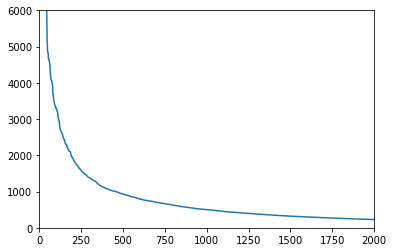

In [16]:
import operator
all_words = sorted(all_words.items(), key = operator.itemgetter(1), reverse = True)
x = []
y = []
for i in range(len(all_words)):
    x.append(i)
    y.append(all_words[i][1])
plt.plot(x, y)
plt.axis([0, 2000, 0, 6000])
plt.show()

In [17]:
## Pick the First 1250 words
features = {} ### (feature, index)
for i in range(2000):
    features[all_words[i][0]] = i
len(features), type(features)

(2000, dict)

### 9) Convert Training and Testing Data into the format which Naive Bayes takes

In [18]:
def get_required_format(x, features):
    N = len(x)
    M = len(features)
    output = np.array([[0 for j in range(M)] for i in range(N)])
    
    for i in range(N):
        doc = x[i]
        for word in doc:
            if word in features:
                output[i][features[word]] += 1
    return output

In [19]:
type(x_train), len(x_train)

(list, 14997)

In [20]:
x_train = get_required_format(x_train, features)
x_test = get_required_format(x_test, features)
x_train, x_test

(array([[ 7,  1,  2, ...,  0,  0,  0],
        [12,  3,  2, ...,  0,  0,  0],
        [ 8,  1,  2, ...,  0,  0,  0],
        ...,
        [ 9,  8,  0, ...,  0,  0,  0],
        [ 5,  3,  0, ...,  0,  0,  0],
        [ 3,  2,  3, ...,  0,  0,  0]]),
 array([[12,  3,  0, ...,  0,  0,  0],
        [ 6,  1,  0, ...,  0,  0,  0],
        [ 6,  2,  2, ...,  0,  0,  0],
        ...,
        [ 4,  1,  4, ...,  0,  0,  0],
        [ 4,  3,  1, ...,  0,  0,  0],
        [ 2,  1,  1, ...,  0,  0,  0]]))

In [21]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [22]:
type(x_train), len(x_train)

(numpy.ndarray, 14997)

In [23]:
x_train.shape, len(y_train)

((14997, 2000), 14997)

In [24]:
x_train.mean(axis = 0)

array([7.75408415, 2.60712142, 2.28072281, ..., 0.01526972, 0.01526972,
       0.01520304])

### 10) Inbuilt Sklearn Naive Bayes

In [25]:
clf = MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
print("Score on Training Data!!!!!")
clf.score(x_train, y_train)

Score on Training Data!!!!!


0.888044275521771

In [27]:
print("Score on Testing Data!!!!!")
y_pred = clf.predict(x_test)
clf.score(x_test, y_test)

Score on Testing Data!!!!!


0.8638

In [28]:
## Printing Classification Report
print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.83      0.74      0.78       278
           comp.graphics       0.88      0.73      0.79       231
 comp.os.ms-windows.misc       0.80      0.85      0.83       255
comp.sys.ibm.pc.hardware       0.76      0.88      0.82       246
   comp.sys.mac.hardware       0.82      0.87      0.84       235
          comp.windows.x       0.90      0.79      0.84       234
            misc.forsale       0.78      0.92      0.85       252
               rec.autos       0.89      0.92      0.91       229
         rec.motorcycles       0.92      0.96      0.94       272
      rec.sport.baseball       0.93      0.92      0.92       252
        rec.sport.hockey       0.94      0.92      0.93       249
               sci.crypt       0.98      0.95      0.96       254
         sci.electronics       0.84      0.88      0.86       254
                 sci.med       0.98      0.90      0.94       241
         

In [29]:
## Printing Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[205   0   0   1   0   0   3   2   2   0   0   1   0   0   0   2   1   2
    1  58]
 [  0 168  20  17   8   5   5   0   0   0   0   0   5   2   1   0   0   0
    0   0]
 [  0   0 217  14   4  12   7   1   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  1   1   7 217  19   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   3   1  20 205   0   4   0   1   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   9  23   5   1 184   6   0   0   0   0   0   1   1   3   0   0   1
    0   0]
 [  0   2   0   5   2   0 232   6   0   1   0   1   3   0   0   0   0   0
    0   0]
 [  0   0   0   0   1   0   5 210   7   2   1   0   3   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   6   3 261   0   0   0   1   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   6   1   2 231  12   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   1   1  14 230   0   0   0   1   0   0   0
    0   0]
 [  1   1   1   0   1   1   0   1   0   0   0 241   3   1   1   0